<a href="https://colab.research.google.com/github/priyanshu3042/Level3Task1/blob/main/Levl3Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Dataset .csv to Dataset .csv



🔹 Linear Regression
R² Score: 0.2634
RMSE: 1.2948

🔹 Decision Tree
R² Score: 0.9106
RMSE: 0.4512

🔹 Random Forest
R² Score: 0.9411
RMSE: 0.3661


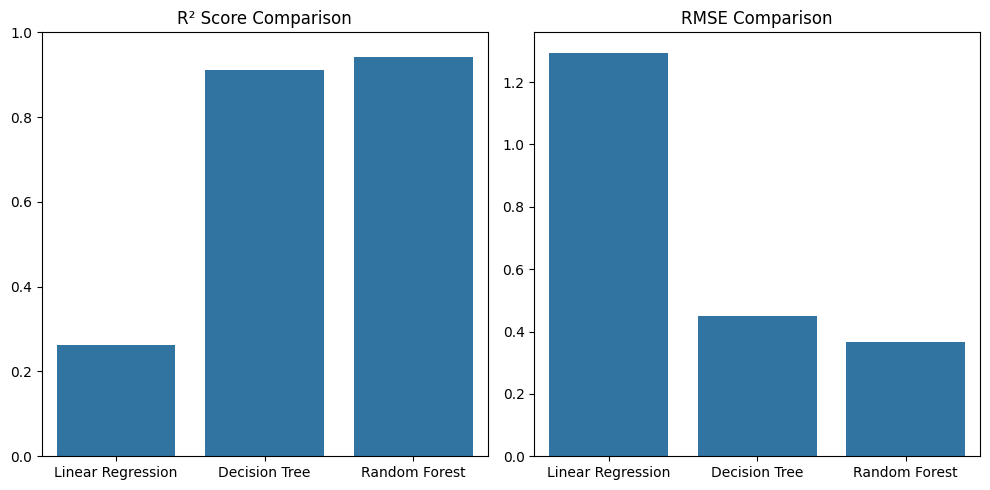

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Load the uploaded dataset (adjust filename if needed)
df = pd.read_csv("Dataset .csv")  # Replace with exact name after upload

# Step 4: Data cleaning
df.drop_duplicates(inplace=True)
df.dropna(subset=['Aggregate rating'], inplace=True)

# Step 5: Select useful features
features = ['Votes', 'Average Cost for two', 'Price range', 'Has Online delivery', 'Has Table booking']

# Encode categorical features if needed
for col in features:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Features and target
X = df[features]
y = df['Aggregate rating']

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train and evaluate models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((name, r2, rmse))
    print(f"\n🔹 {name}")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")

# Step 8: Plot comparison
model_names = [r[0] for r in results]
r2_scores = [r[1] for r in results]
rmse_vals = [r[2] for r in results]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=model_names, y=r2_scores)
plt.title("R² Score Comparison")
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
sns.barplot(x=model_names, y=rmse_vals)
plt.title("RMSE Comparison")

plt.tight_layout()
plt.show()